# Explore here

## 1) Unzip file into data/images folder
Unzip image file and visualize the first 10 image names to check for correctness.

In [13]:
import zipfile
import cv2
import os

zip_path = "./train.zip"
extract_to = "../data/images/train" 

"""
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed.")
"""

# Check file size and visualize first 10 files
images = os.listdir(extract_to)
print(f'{len(images )} found in data folder at {extract_to}')
print('First 10 image names')
print(images[:10])



25000 found in data folder at ../data/images/train
First 10 image names
['cat.9388.jpg', 'cat.2683.jpg', 'cat.7252.jpg', 'dog.3446.jpg', 'dog.2177.jpg', 'cat.9739.jpg', 'cat.1596.jpg', 'cat.10616.jpg', 'cat.7645.jpg', 'dog.8136.jpg']


## 2) Import required libraries

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 3) Visualize images

In [15]:
image_files = {"Dog": [], "Cat": []} 

for filename in images[:30]: 
    img_path = os.path.join(extract_to, filename)
    img = cv2.imread(img_path)  
    img = cv2.resize(img, (200, 200))

    label = "Dog" if "dog" in filename else "Cat"
    image_files[label].append(img)

dog_images = image_files.get("Dog", [])
cat_images = image_files.get("Cat", [])

### 3.1) Display dog images

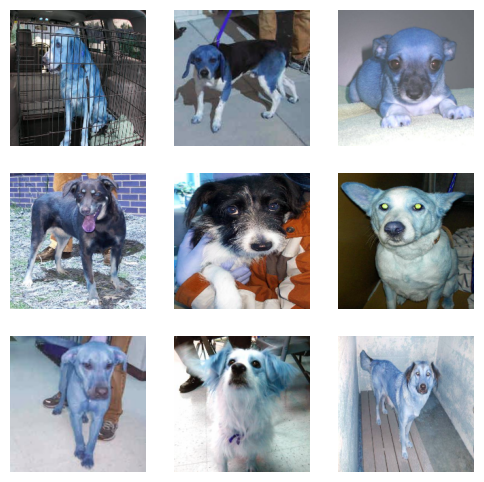

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(6,6))
axes[0, 0].imshow(dog_images[0])  
axes[0, 0].axis("off")  
axes[0, 1].imshow(dog_images[1])  
axes[0, 1].axis("off")
axes[0, 2].imshow(dog_images[2])  
axes[0, 2].axis("off")
axes[1, 0].imshow(dog_images[3])  
axes[1, 0].axis("off")
axes[1, 1].imshow(dog_images[4])  
axes[1, 1].axis("off")
axes[1, 2].imshow(dog_images[5])  
axes[1, 2].axis("off")
axes[2, 0].imshow(dog_images[6])  
axes[2, 0].axis("off")
axes[2, 1].imshow(dog_images[7])  
axes[2, 1].axis("off")
axes[2, 2].imshow(dog_images[8])  
axes[2, 2].axis("off")
plt.show() 

### 3.2) Display cat images

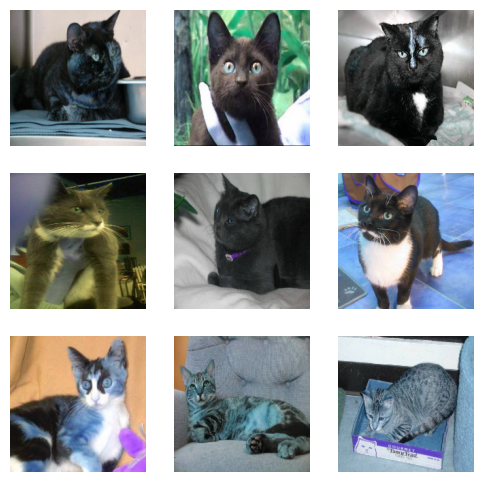

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(6,6))
axes[0, 0].imshow(cat_images[0])  
axes[0, 0].axis("off")  
axes[0, 1].imshow(cat_images[1])  
axes[0, 1].axis("off")
axes[0, 2].imshow(cat_images[2])  
axes[0, 2].axis("off")
axes[1, 0].imshow(cat_images[3])  
axes[1, 0].axis("off")
axes[1, 1].imshow(cat_images[4])  
axes[1, 1].axis("off")
axes[1, 2].imshow(cat_images[5])  
axes[1, 2].axis("off")
axes[2, 0].imshow(cat_images[6])  
axes[2, 0].axis("off")
axes[2, 1].imshow(cat_images[7])  
axes[2, 1].axis("off")
axes[2, 2].imshow(cat_images[8])  
axes[2, 2].axis("off")
plt.show() 

## 4) Process data
Process and convert data in order to be suitable for building deep learning model.

In [18]:
# Convert images to Numpy arrays
# Divide pixel values by 255 in order to normalie data

X_dog = np.array(dog_images, dtype='float32') / 255
X_cat = np.array(cat_images, dtype='float32') / 255

# Label dog images as 1 and cat images as 0
y_dog = np.ones(len(X_dog))
y_cat = np.zeros(len(X_cat))

# Merge X and y
X = np.concatenate((X_dog,X_cat), axis=0)
y = np.concatenate((y_dog, y_cat), axis=0)

# Convert y to categorical with one-hot encoding
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=2)

## 5) Split data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=117)

## 6) Build CNN neural network model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(200,200,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu', input_shape=(200,200,3)),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation='relu', input_shape=(200,200,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5), # to reduce overfitting
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## 7) Train model

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint= ModelCheckpoint('best_model.h5', save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5000 - loss: 0.6895

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6895 - val_accuracy: 0.3333 - val_loss: 2.0760
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6667 - loss: 1.0581

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6667 - loss: 1.0581 - val_accuracy: 0.3333 - val_loss: 1.0280
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6667 - loss: 0.6112

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6667 - loss: 0.6112 - val_accuracy: 0.6667 - val_loss: 0.6047
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 0.7916 - val_accuracy: 0.8333 - val_loss: 0.6358
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.6567 - val_accuracy: 0.3333 - val_loss: 0.8018
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.5694 - val_accuracy: 0.3333 - val_loss: 1.0491
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.6101 - val_accuracy: 0.3333 - val_loss: 1.2013
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.5437 - val_accuracy: 0.3333 - val_loss: 1.1732


## 8) Make predictions

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained model
model = load_model("best_model.h5")

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    return "Dog" if prediction[0][1] > prediction[0][0] else "Cat"

# Test with a new image
print(predict_image("/workspaces/Bertuzzi-deep-learning/data/images/train/dog.4053.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Dog
